# Demo: Interpreting Prophet Forecasts for Decision Making

## Notebook Set Up

In [ ]:
# Install the required libraries
!pip install prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet


import hvplot.pandas

%matplotlib inline

In [ ]:
# Import the `files` library to allow files upload
from google.colab import files

## Plot the Data

In [2]:
# Upload "hourly_grid_prices.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

NameError: name 'files' is not defined

In [3]:
hourly_prices = pd.read_csv(
    "../Resources/hourly_grid_prices.csv",
    index_col='day-hour',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Display the first and last five rows of the DataFrame
display(hourly_prices.head())
display(hourly_prices.tail())

/var/folders/y1/wwd_67td207gyk1vt0gf7w500000gn/T/ipykernel_59658/3846632151.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hourly_prices = pd.read_csv(
/var/folders/y1/wwd_67td207gyk1vt0gf7w500000gn/T/ipykernel_59658/3846632151.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices = pd.read_csv(


,Price
day-hour,
2015-10-31 01:00:00,18.15
2015-10-31 02:00:00,20.73
2015-10-31 03:00:00,19.49
2015-10-31 04:00:00,17.75
2015-10-31 05:00:00,17.38


,Price
day-hour,
2020-10-14 20:00:00,19.23
2020-10-14 21:00:00,13.45
2020-10-14 22:00:00,15.24
2020-10-14 23:00:00,17.00
2020-10-15 00:00:00,18.73


In [4]:
# Plot the DataFrame
hourly_prices.hvplot()

:Curve   [day-hour]   (Price)

## Prepare the Data

In [5]:
# Reset the index of the DataFrame
prophet_df = hourly_prices.reset_index()

# Review the first and last five rows of the DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,day-hour,Price
0,2015-10-31 01:00:00,18.15
1,2015-10-31 02:00:00,20.73
2,2015-10-31 03:00:00,19.49
3,2015-10-31 04:00:00,17.75
4,2015-10-31 05:00:00,17.38


,day-hour,Price
43363,2020-10-14 20:00:00,19.23
43364,2020-10-14 21:00:00,13.45
43365,2020-10-14 22:00:00,15.24
43366,2020-10-14 23:00:00,17.00
43367,2020-10-15 00:00:00,18.73


In [6]:
# Prepare the training data to be read into a prophet model
# Rename the columns to names that Prophet recognizes
prophet_df.columns = ['ds', 'y']
prophet_df.head()

,ds,y
0,2015-10-31 01:00:00,18.15
1,2015-10-31 02:00:00,20.73
2,2015-10-31 03:00:00,19.49
3,2015-10-31 04:00:00,17.75
4,2015-10-31 05:00:00,17.38


In [7]:
# Confirm that there are no NaN values
prophet_df = prophet_df.dropna()
prophet_df.tail()

,ds,y
43363,2020-10-14 20:00:00,19.23
43364,2020-10-14 21:00:00,13.45
43365,2020-10-14 22:00:00,15.24
43366,2020-10-14 23:00:00,17.00
43367,2020-10-15 00:00:00,18.73


## Create a Prophet Model

In [8]:
# Call the Prophet function and store as an object
m = Prophet()
m

## Fit the Prophet Model

In [9]:
# Fit the time series Prophet model
m.fit(prophet_df)

18:19:49 - cmdstanpy - INFO - Chain [1] start processing
18:19:54 - cmdstanpy - INFO - Chain [1] done processing


## Set Up for Predictions

In [15]:
# future.shape[0] - prophet_df.shape[0]

720

In [10]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=720, freq='H')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))
display(future.tail(10))

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1803: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2015-10-31 01:00:00
1,2015-10-31 02:00:00
2,2015-10-31 03:00:00
3,2015-10-31 04:00:00
4,2015-10-31 05:00:00
5,2015-10-31 06:00:00
6,2015-10-31 07:00:00
7,2015-10-31 08:00:00
8,2015-10-31 09:00:00
9,2015-10-31 10:00:00


,ds
44078,2020-11-13 15:00:00
44079,2020-11-13 16:00:00
44080,2020-11-13 17:00:00
44081,2020-11-13 18:00:00
44082,2020-11-13 19:00:00
44083,2020-11-13 20:00:00
44084,2020-11-13 21:00:00
44085,2020-11-13 22:00:00
44086,2020-11-13 23:00:00
44087,2020-11-14 00:00:00


## Build a Table of Predictions

In [16]:
# Make a forecast based on the future DataFrame
forecast = m.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-31 01:00:00,22.394729,-3.450189,34.363830,22.394729,22.394729,-5.926657,-5.926657,-5.926657,-5.794112,...,-0.380100,-0.380100,-0.380100,0.247555,0.247555,0.247555,0.0,0.0,0.0,16.468072
1,2015-10-31 02:00:00,22.395133,-4.025001,34.682575,22.395133,22.395133,-6.994350,-6.994350,-6.994350,-6.786260,...,-0.457956,-0.457956,-0.457956,0.249866,0.249866,0.249866,0.0,0.0,0.0,15.400783
2,2015-10-31 03:00:00,22.395538,-4.799156,33.347747,22.395538,22.395538,-7.848194,-7.848194,-7.848194,-7.558616,...,-0.541717,-0.541717,-0.541717,0.252139,0.252139,0.252139,0.0,0.0,0.0,14.547344
3,2015-10-31 04:00:00,22.395942,-3.018179,33.624580,22.395942,22.395942,-8.040814,-8.040814,-8.040814,-7.663789,...,-0.631401,-0.631401,-0.631401,0.254376,0.254376,0.254376,0.0,0.0,0.0,14.355127
4,2015-10-31 05:00:00,22.396346,-2.948154,33.887710,22.396346,22.396346,-7.111480,-7.111480,-7.111480,-6.641110,...,-0.726945,-0.726945,-0.726945,0.256575,0.256575,0.256575,0.0,0.0,0.0,15.284866


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44083,2020-11-13 20:00:00,18.784802,3.062279,40.311805,18.566260,19.025857,3.191636,3.191636,3.191636,3.911880,...,-0.073705,-0.073705,-0.073705,-0.646539,-0.646539,-0.646539,0.0,0.0,0.0,21.976437
44084,2020-11-13 21:00:00,18.784239,1.937413,37.969844,18.563601,19.026297,0.884021,0.884021,0.884021,1.659075,...,-0.124803,-0.124803,-0.124803,-0.650251,-0.650251,-0.650251,0.0,0.0,0.0,19.668260
44085,2020-11-13 22:00:00,18.783676,-1.470031,36.092150,18.560942,19.026737,-1.710089,-1.710089,-1.710089,-0.875475,...,-0.180671,-0.180671,-0.180671,-0.653944,-0.653944,-0.653944,0.0,0.0,0.0,17.073587
44086,2020-11-13 23:00:00,18.783113,-3.828674,33.095066,18.559025,19.027192,-3.960461,-3.960461,-3.960461,-3.061187,...,-0.241657,-0.241657,-0.241657,-0.657617,-0.657617,-0.657617,0.0,0.0,0.0,14.822652
44087,2020-11-14 00:00:00,18.782550,-7.037664,31.300835,18.557150,19.028069,-5.610560,-5.610560,-5.610560,-4.641235,...,-0.308056,-0.308056,-0.308056,-0.661270,-0.661270,-0.661270,0.0,0.0,0.0,13.171990


## Plot the Forecast

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


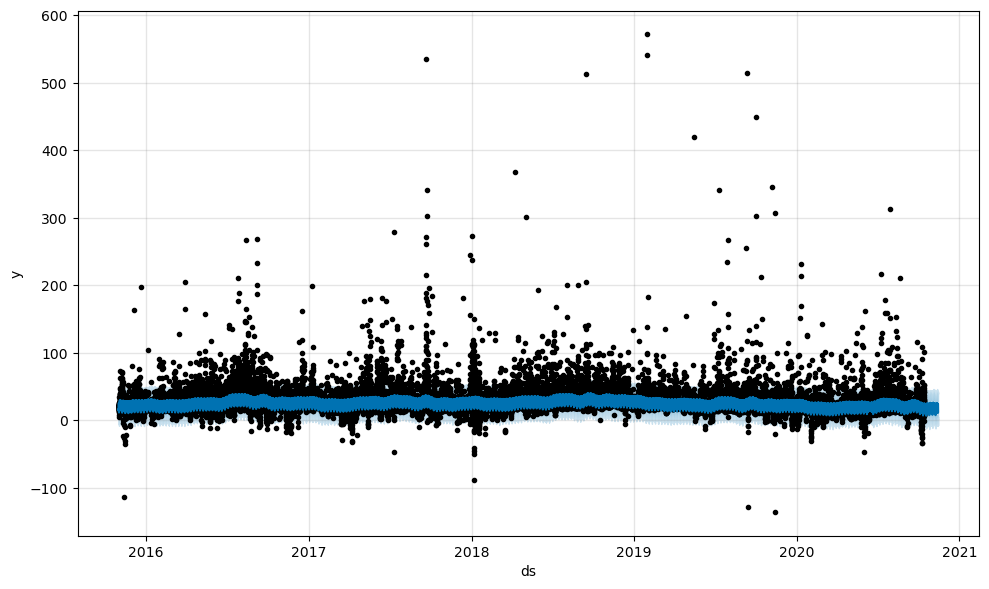

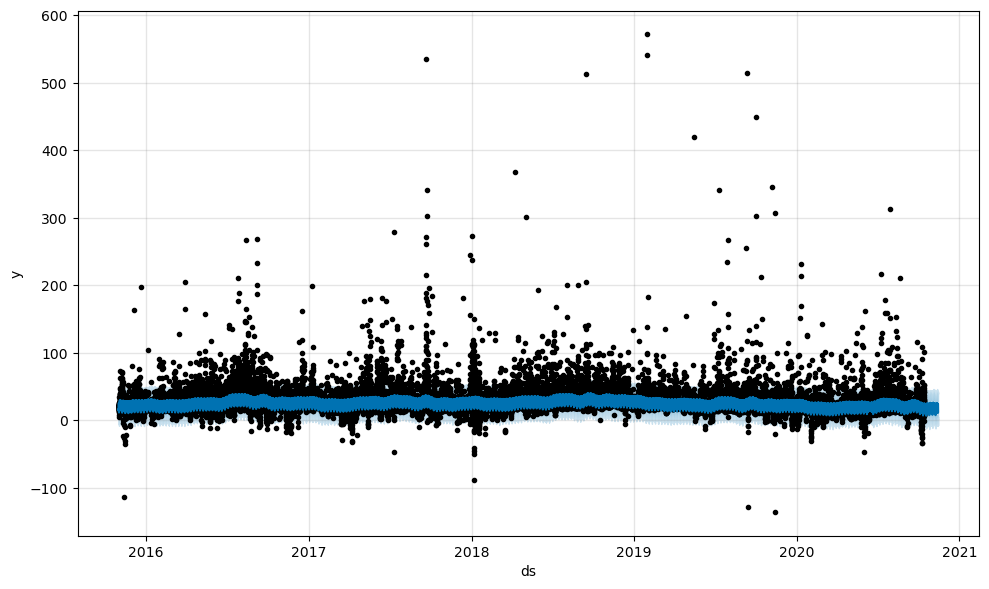

In [17]:
# Plot the forecast using the model’s plot function
m.plot(forecast)

## Read the Forecast Results

In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [19]:
# Display the underlying forecast dataframe (tail)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
44083,2020-11-13 20:00:00,21.976437,3.062279,40.311805
44084,2020-11-13 21:00:00,19.668260,1.937413,37.969844
44085,2020-11-13 22:00:00,17.073587,-1.470031,36.092150
44086,2020-11-13 23:00:00,14.822652,-3.828674,33.095066
44087,2020-11-14 00:00:00,13.171990,-7.037664,31.300835


## Plot the Upper and Lower Bounds of the Forecast

In [20]:
# Reset the index to this datetime column so that our plot looks nice
forecast = forecast.set_index('ds')

# Display the DataFrame
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2015-10-31 01:00:00,22.394729,-3.450189,34.363830,22.394729,22.394729,-5.926657,-5.926657,-5.926657,-5.794112,-5.794112,...,-0.380100,-0.380100,-0.380100,0.247555,0.247555,0.247555,0.0,0.0,0.0,16.468072
2015-10-31 02:00:00,22.395133,-4.025001,34.682575,22.395133,22.395133,-6.994350,-6.994350,-6.994350,-6.786260,-6.786260,...,-0.457956,-0.457956,-0.457956,0.249866,0.249866,0.249866,0.0,0.0,0.0,15.400783
2015-10-31 03:00:00,22.395538,-4.799156,33.347747,22.395538,22.395538,-7.848194,-7.848194,-7.848194,-7.558616,-7.558616,...,-0.541717,-0.541717,-0.541717,0.252139,0.252139,0.252139,0.0,0.0,0.0,14.547344
2015-10-31 04:00:00,22.395942,-3.018179,33.624580,22.395942,22.395942,-8.040814,-8.040814,-8.040814,-7.663789,-7.663789,...,-0.631401,-0.631401,-0.631401,0.254376,0.254376,0.254376,0.0,0.0,0.0,14.355127
2015-10-31 05:00:00,22.396346,-2.948154,33.887710,22.396346,22.396346,-7.111480,-7.111480,-7.111480,-6.641110,-6.641110,...,-0.726945,-0.726945,-0.726945,0.256575,0.256575,0.256575,0.0,0.0,0.0,15.284866


In [21]:
# forecast[['yhat', 'yhat_lower', 'yhat_upper']].hvplot()

In [24]:
# Plot predictions for our forecast period
forecast[['trend', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

## Break Down the Forecast

In [25]:
# Reset "ds" from the datetime index back to a column
forecast = forecast.reset_index()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-31 01:00:00,22.394729,-3.450189,34.363830,22.394729,22.394729,-5.926657,-5.926657,-5.926657,-5.794112,...,-0.380100,-0.380100,-0.380100,0.247555,0.247555,0.247555,0.0,0.0,0.0,16.468072
1,2015-10-31 02:00:00,22.395133,-4.025001,34.682575,22.395133,22.395133,-6.994350,-6.994350,-6.994350,-6.786260,...,-0.457956,-0.457956,-0.457956,0.249866,0.249866,0.249866,0.0,0.0,0.0,15.400783
2,2015-10-31 03:00:00,22.395538,-4.799156,33.347747,22.395538,22.395538,-7.848194,-7.848194,-7.848194,-7.558616,...,-0.541717,-0.541717,-0.541717,0.252139,0.252139,0.252139,0.0,0.0,0.0,14.547344
3,2015-10-31 04:00:00,22.395942,-3.018179,33.624580,22.395942,22.395942,-8.040814,-8.040814,-8.040814,-7.663789,...,-0.631401,-0.631401,-0.631401,0.254376,0.254376,0.254376,0.0,0.0,0.0,14.355127
4,2015-10-31 05:00:00,22.396346,-2.948154,33.887710,22.396346,22.396346,-7.111480,-7.111480,-7.111480,-6.641110,...,-0.726945,-0.726945,-0.726945,0.256575,0.256575,0.256575,0.0,0.0,0.0,15.284866


/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing pytho

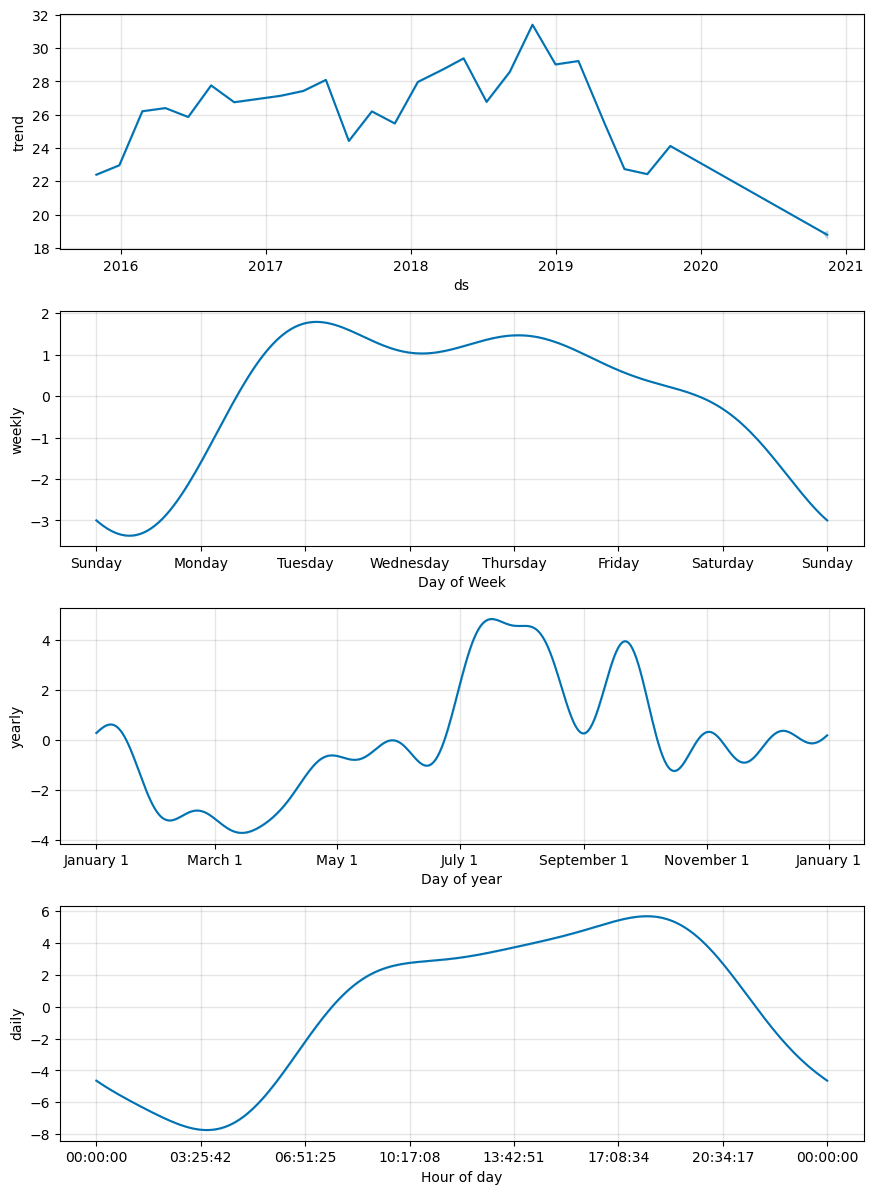

In [26]:
# Plot the individual time series components of the model
fig2 = m.plot_components(forecast)